## Clustering over 24 hours

In [105]:
import numpy as np
import xarray as xr
import matplotlib.colors as cs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from sklearn.mixture import GaussianMixture
from scipy.stats import gaussian_kde
from IPython import display
import time

%matplotlib inline

### Loading data

In [54]:
raw_data = pd.read_csv("HOT297_10000pts_hourly_3param.csv")

In [55]:
dates = raw_data['DateTime'].unique()

In [56]:
log_data = {'fsc_small': np.log(raw_data['fsc_small']),
        'pe': np.log(raw_data['pe']),
        'chl_small':np.log(raw_data['chl_small'])}
data = pd.DataFrame(log_data)
data

,fsc_small,pe,chl_small
0,1.363506,0.285293,0.975285
1,2.197743,0.719505,0.997543
2,2.264640,0.264265,1.354283
3,2.107236,0.721473,0.861783
4,2.233159,0.186916,1.603546
...,...,...,...
739995,2.821454,0.370513,1.308415
739996,0.952290,0.551526,1.051282
739997,1.768819,0.031481,2.573544
739998,0.828335,0.789599,1.564195


### Cluster

In [88]:
dense_frac = 0.004
n_clusters = 6
n_points = 10000

init = True

In [89]:
all_labels = np.zeros((n_points,len(dates)))

for i in range(26,50,1):
    
    #sort data in timeslot
    data_date = data.loc[raw_data["DateTime"] == dates[i]]
    selected_data = data_date.iloc[0:n_points , :]
    
    xyz = np.row_stack(([selected_data['fsc_small'], selected_data['pe'],selected_data['chl_small']]))
    z = gaussian_kde(xyz)(xyz)
    dense_data = selected_data[(z>dense_frac*z.max()) & (selected_data['pe']<3) & (selected_data['chl_small']<5)]
    non_dense_data = selected_data.drop(dense_data.index)
    
    #label non-dense data with gmm
    features=np.stack((non_dense_data['chl_small'],non_dense_data['pe'], non_dense_data['fsc_small']),axis=1);
    if init == True:
        gmm = GaussianMixture(n_components=n_clusters)
        init = False
    else:
        gmm = GaussianMixture(n_components=n_clusters, means_init=means)
        
    labels = gmm.fit_predict(features)
    all_labels[:,i] = np.pad(labels,(0,n_points-len(labels)),mode='constant')
    
    means = gmm.means_

### Plot

<Figure size 432x288 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

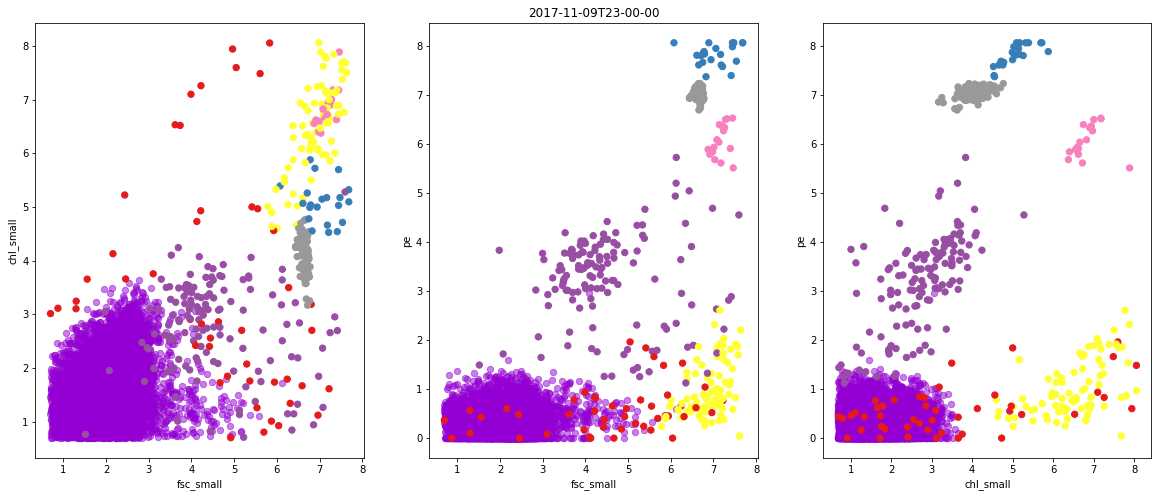

In [82]:
for i in range(26,50,1):
    #sort data in timeslot
    data_date = data.loc[raw_data["DateTime"] == dates[i]]
    selected_data = data_date.iloc[0:n_points , :]
    
    xyz = np.row_stack(([selected_data['fsc_small'], selected_data['pe'],selected_data['chl_small']]))
    z = gaussian_kde(xyz)(xyz)
    dense_data = selected_data[(z>dense_frac*z.max()) & (selected_data['pe']<3) & (selected_data['chl_small']<5)]
    non_dense_data = selected_data.drop(dense_data.index)
    
    #plot
    labels = all_labels[0:len(non_dense_data['fsc_small']),i]
    
    display.display(plt.gcf()); plt.clf()   
    fig = plt.figure(figsize=(20,8))
    
    plt.subplot(1,3,1)
    plt.scatter(dense_data['fsc_small'], dense_data['chl_small'],40,c='darkviolet',alpha=0.5)
    plt.scatter(non_dense_data['fsc_small'], non_dense_data['chl_small'],40,c=labels, cmap='Set1')
    plt.xlabel("fsc_small")
    plt.ylabel('chl_small') 
    
    plt.subplot(1,3,2)
    plt.scatter(dense_data['fsc_small'], dense_data['pe'],40,c='darkviolet',alpha=0.5)
    plt.scatter(non_dense_data['fsc_small'], non_dense_data['pe'],40,c=labels, cmap='Set1')
    plt.xlabel("fsc_small")
    plt.ylabel('pe') 
    plt.title(dates[i])
    
    plt.subplot(1,3,3)
    plt.scatter(dense_data['chl_small'], dense_data['pe'],40,c='darkviolet',alpha=0.5)
    plt.scatter(non_dense_data['chl_small'], non_dense_data['pe'],40,c=labels, cmap='Set1')
    plt.xlabel("chl_small")
    plt.ylabel('pe') 
    
    display.clear_output(wait=True)
    time.sleep(0.1)

### Movie

In [86]:
from matplotlib.animation import FuncAnimation  #creating animations and videos.
from IPython.display import Video, HTML         #embedding videos in the notebook

In [110]:
def animation_func(i):
    fig.clear()                
    
    #sort data in timeslot
    data_date = data.loc[raw_data["DateTime"] == dates[i+26]]
    selected_data = data_date.iloc[0:n_points , :]
    
    xyz = np.row_stack(([selected_data['fsc_small'], selected_data['pe'],selected_data['chl_small']]))
    z = gaussian_kde(xyz)(xyz)
    dense_data = selected_data[(z>dense_frac*z.max()) & (selected_data['pe']<3) & (selected_data['chl_small']<5)]
    non_dense_data = selected_data.drop(dense_data.index)
    
    #plot
    labels = all_labels[0:len(non_dense_data['fsc_small']),i+26]
    cmap = cs.ListedColormap(cm.get_cmap("Set3").colors[:6])
    
    ax = fig.add_subplot(1,3,1)
    ax.scatter(dense_data['fsc_small'], dense_data['chl_small'],40,c='darkviolet',alpha=0.5)
    ax.scatter(non_dense_data['fsc_small'], non_dense_data['chl_small'],40,c=labels, cmap=cmap)
    ax.set_xlabel("fsc_small")
    ax.set_ylabel('chl_small')  
    
    ax = fig.add_subplot(1,3,2)
    ax.scatter(dense_data['fsc_small'], dense_data['pe'],40,c='darkviolet',alpha=0.5)
    ax.scatter(non_dense_data['fsc_small'], non_dense_data['pe'],40,c=labels, cmap=cmap)
    ax.set_xlabel("fsc_small")
    ax.set_ylabel('pe') 
    ax.set_title(dates[i+26]) 
    
    ax = fig.add_subplot(1,3,3)
    ax.scatter(dense_data['chl_small'], dense_data['pe'],40,c='darkviolet',alpha=0.5)
    p = ax.scatter(non_dense_data['chl_small'], non_dense_data['pe'],40,c=labels, cmap=cmap)
    ax.set_xlabel("chl_small")
    ax.set_ylabel('pe') 
    cbar = fig.colorbar(p)
    cbar.ax.set_yticklabels(['unknown', 'unknown', 'synecho','croco','picoeuk','beads'])
    
    
fig = plt.figure(figsize=(20,8))

animation = FuncAnimation(fig, animation_func, frames = 24)

animation.save('movie.mp4') 
plt.close()
Video('movie.mp4')